# Problem statement
The International Day of Happiness is celebrated globally on March 20 every year with an objective to promote happiness and well-being as a fundamental human right for all. On this International Day of Happiness, we are bringing back all the joy and happiness for you. This fun challenge requires you to build a model that detects emotions of your favorite characters of the iconic toon show—Tom and Jerry.

Task
You are required to extract frames from a video clip that is provided in the dataset and classify the primary character’s emotion into one of the following five classes:

* Angry
* Happy
* Sad
* Surprised
* Unknown


Note:

The character prioritization is Tom > Jerry > Others.
In case a frame does not contain Tom or Jerry’s faces for emotion detection, it is classified as ‘Unknown’,

In [13]:
from fastai.vision import *
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
import cv2
warnings.simplefilter("ignore")
from fastai.callbacks import *
from skimage.io import imread
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [14]:
train=pd.read_csv('Train.csv',sep=',')

In [15]:
train.head()

,Frame_ID,Emotion
0,frame0.jpg,happy
1,frame1.jpg,happy
2,frame2.jpg,surprised
3,frame3.jpg,surprised
4,frame4.jpg,angry


In [17]:
#run only when frame needs to be extracted
count=0

videoFile = "/content/drive/My Drive/Train Tom and jerry.mp4"
# capturing the video from the given path
cap = cv2.VideoCapture(videoFile) 
#here frame rate is 5(you can change it to any other number

frameRate=cap.get(5)
x=1
while(cap.isOpened()):
  frameId=cap.get(1) #current frame number
  ret,frame=cap.read()
  if(ret!=True):
    break 
  if(frameId % math.floor(frameRate)==0):
    
        filename ="/content/drive/My Drive/Sampled_Image_Train/frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)


cap.release()
print ("Done!")


Done!


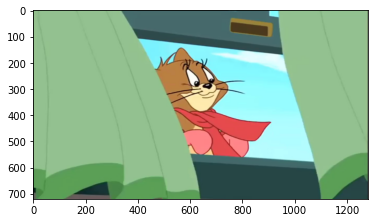

In [18]:
img = plt.imread('/content/drive/My Drive/Sampled_Image_Train/frame0.jpg')   # reading image using its name
plt.imshow(img)

In [19]:
train_path='/content/drive/My Drive/Sampled_Image_Train/'
#test_path=''
tfms = get_transforms()
data=ImageDataBunch.from_df(
  path=train_path,df=train,ds_tfms=tfms,
  size=224,bs=32
).normalize()

In [21]:
print("Size of the image is")
print(data.one_batch()[0].size())
print(data.classes)

Size of the image is
torch.Size([32, 3, 224, 224])
['Unknown', 'angry', 'happy', 'sad', 'surprised']


In [22]:
learner=cnn_learner(data,models.resnet34,metrics=accuracy)
learner.lr_find()

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,time
0,2.174044,3.636883,0.288136,00:11
1,1.820328,1.480617,0.576271,00:11
2,1.446268,1.150774,0.711864,00:11
3,1.233274,1.109875,0.694915,00:11


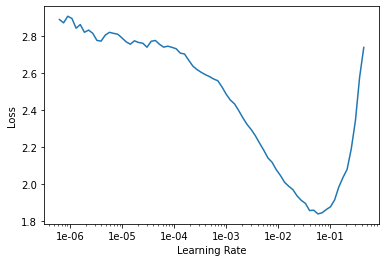

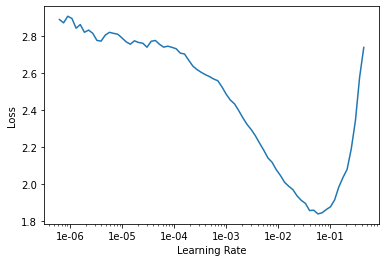

In [23]:
learner.recorder.plot()
fig=learner.recorder.plot(return_fig=True)
learner.fit_one_cycle(4)


In [24]:
learner.fit_one_cycle(100,slice(1e-3,3e-4),pct_start=0.05)
learner.save('tom_n_jerry')

epoch,train_loss,valid_loss,accuracy,time
0,0.802543,1.097597,0.677966,00:11
1,0.841296,1.082787,0.694915,00:11
2,0.823690,1.095705,0.711864,00:11
3,0.830396,1.099231,0.711864,00:11
4,0.797109,1.110541,0.711864,00:11
5,0.751633,1.121340,0.711864,00:11
6,0.724423,1.133254,0.711864,00:11
7,0.706872,1.124945,0.694915,00:11
8,0.679649,1.095468,0.694915,00:11
9,0.648972,1.098605,0.677966,00:11


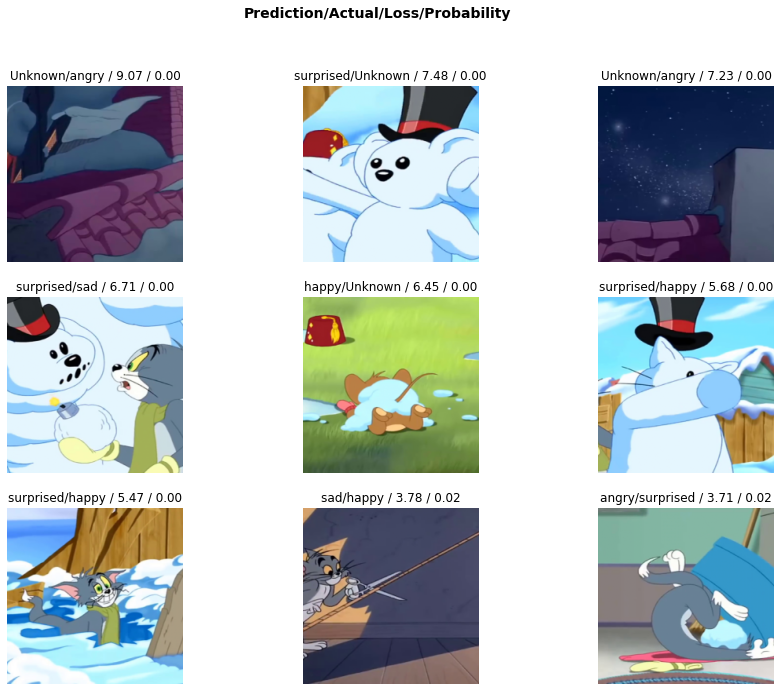

In [27]:
interpolation=ClassificationInterpretation.from_learner(learner)
losses,indexes=interpolation.top_losses()


len(data.valid_ds)==len(losses)==len(indexes)
interpolation.plot_top_losses(9, figsize=(15,11))
plt.savefig('tom.png')

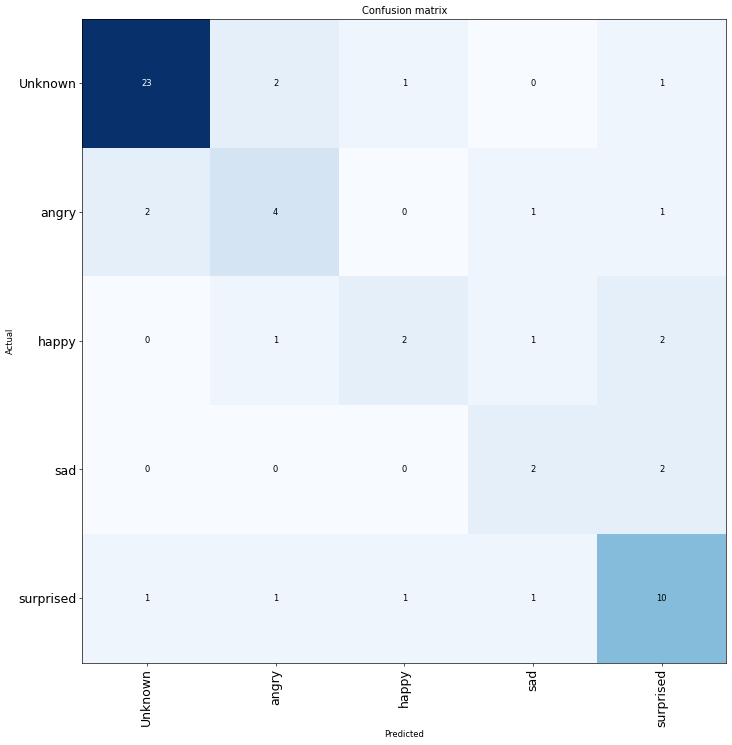

In [33]:
interpolation.plot_confusion_matrix(figsize=(12,12),dpi=60)
plt.savefig('tom_cm.png')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [29]:
print(interpolation.most_confused(min_val=2))

[('Unknown', 'angry', 2), ('angry', 'Unknown', 2), ('happy', 'surprised', 2), ('sad', 'surprised', 2)]


In [30]:
print(accuracy(*learner.TTA()))

tensor(0.6949)
